In [ ]:
!pip install numpy matplotlib scikit-learn tensorflow

In [ ]:
!pip uninstall -y keras tensorflow-gpu

Found existing installation: keras 3.5.0
Uninstalling keras-3.5.0:
  Successfully uninstalled keras-3.5.0


In [ ]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 8.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Un

In [ ]:
!pip show tensorflow
!pip show numpy

Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
   

Epoch 1/1000
25/25 [==============================] - 3s 43ms/step - loss: 0.5253 - val_loss: 0.5063
Epoch 2/1000
25/25 [==============================] - 1s 25ms/step - loss: 0.4817 - val_loss: 0.4806
Epoch 3/1000
25/25 [==============================] - 1s 25ms/step - loss: 0.4493 - val_loss: 0.4537
Epoch 4/1000
25/25 [==============================] - 1s 26ms/step - loss: 0.4192 - val_loss: 0.4338
Epoch 5/1000
25/25 [==============================] - 1s 26ms/step - loss: 0.3917 - val_loss: 0.4146
Epoch 6/1000
25/25 [==============================] - 1s 23ms/step - loss: 0.3670 - val_loss: 0.3914
Epoch 7/1000
25/25 [==============================] - 1s 25ms/step - loss: 0.3522 - val_loss: 0.3769
Epoch 8/1000
25/25 [==============================] - 1s 24ms/step - loss: 0.3336 - val_loss: 0.3679
Epoch 9/1000
25/25 [==============================] - 1s 23ms/step - loss: 0.3161 - val_loss: 0.3467
Epoch 10/1000
25/25 [==============================] - 1s 25ms/step - loss: 0.2993 - val_lo

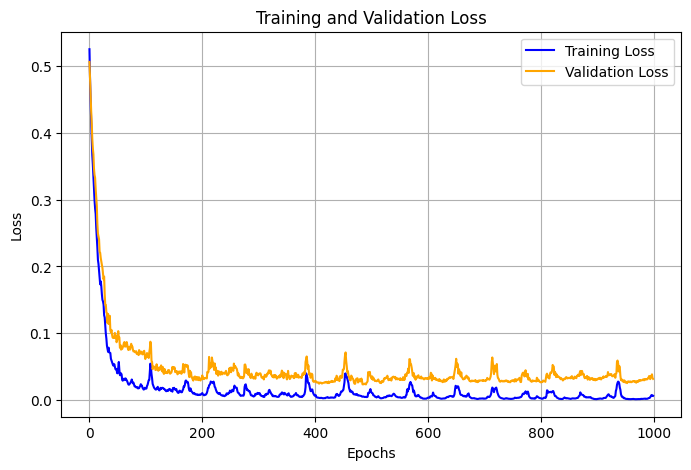

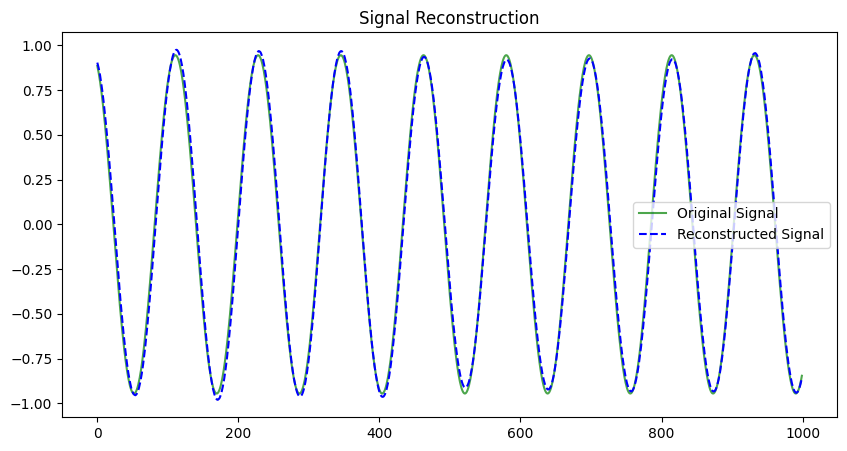

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# **Генерація синусоїдальних сигналів**
def generate_sine_wave(samples=1000, frequency=5, amplitude=1, phase=0):
    t = np.linspace(0, 2 * np.pi, samples)
    return amplitude * np.sin(frequency * t + phase)

# **Підготовка даних**
def generate_dataset(n_samples=1000, signal_dim=1000):
    signals = []
    for _ in range(n_samples):
        freq = np.random.uniform(1, 10)  # Частота від 1 до 10 Гц
        amp = np.random.uniform(0.5, 1.5)  # Амплітуда від 0.5 до 1.5
        phase = np.random.uniform(0, 2 * np.pi)  # Фаза від 0 до 2π
        signal = generate_sine_wave(samples=signal_dim, frequency=freq, amplitude=amp, phase=phase)
        signals.append(signal)
    return np.array(signals)

# **Параметри**
n_samples = 1000
signal_dim = 1000
latent_dim = 5  # Розмір латентного простору

# Генерація даних
data = generate_dataset(n_samples=n_samples, signal_dim=signal_dim)
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# **Створення автоенкодера**
def build_autoencoder(input_dim, latent_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(latent_dim, activation='relu'),  # Латентний простір
        Dense(256, activation='relu'),
        Dense(512, activation='relu'),
        Dense(input_dim, activation='linear')  # Вихідний шар
    ])
    return model

autoencoder = build_autoencoder(input_dim=signal_dim, latent_dim=latent_dim)
autoencoder.compile(optimizer='adam', loss='mse')

# **Навчання**
history = autoencoder.fit(
    X_train, X_train,
    validation_data=(X_test, X_test),
    epochs=1000,
    batch_size=32,
    verbose=1
)

# **Оцінка якості**
reconstructed = autoencoder.predict(X_test)
mse = [mean_squared_error(X_test[i], reconstructed[i]) for i in range(len(X_test))]
r2 = [r2_score(X_test[i], reconstructed[i]) for i in range(len(X_test))]
print(f"Average MSE: {np.mean(mse):.4f}")
print(f"Average R2 Score: {np.mean(r2):.4f}")

# **Візуалізація втрат**
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# **Візуалізація сигналів**
plt.figure(figsize=(10, 5))
plt.plot(X_test[0], label='Original Signal', color='green', alpha=0.7)
plt.plot(reconstructed[0], label='Reconstructed Signal', color='blue', linestyle='--')
plt.title('Signal Reconstruction')
plt.legend()
plt.show()

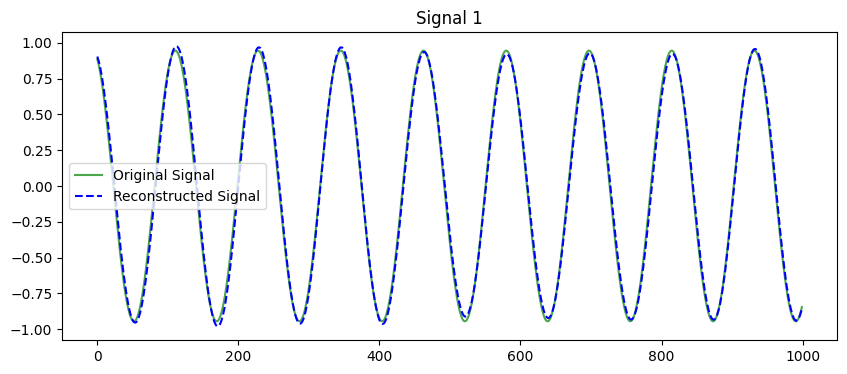

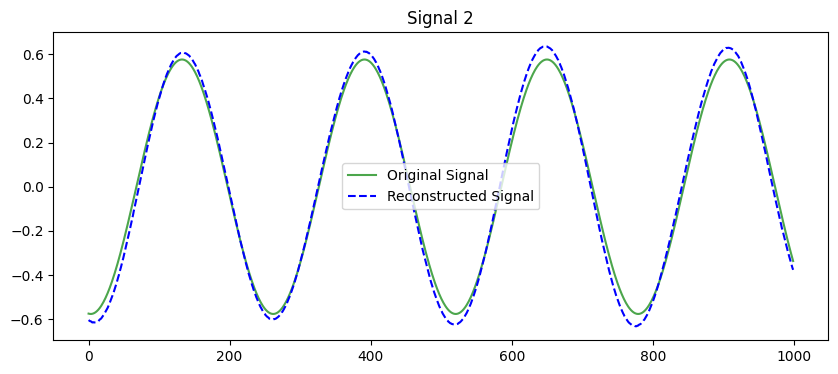

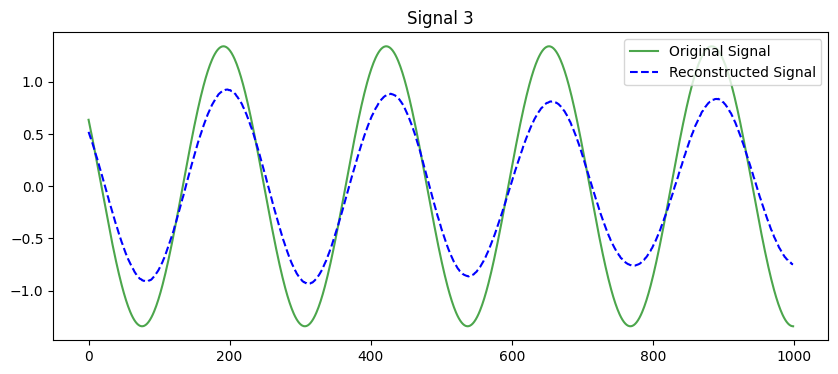

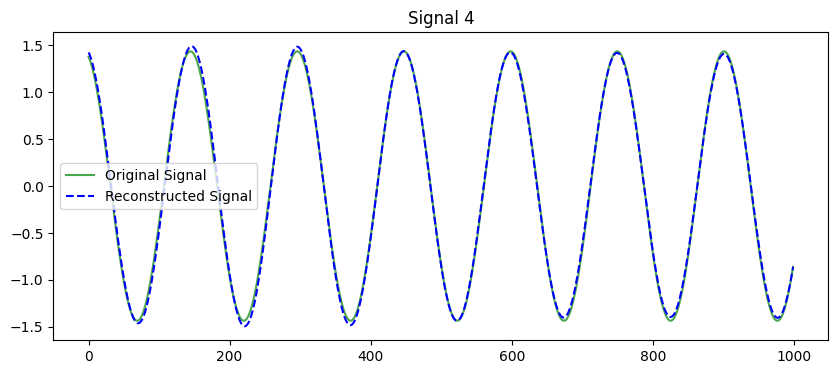

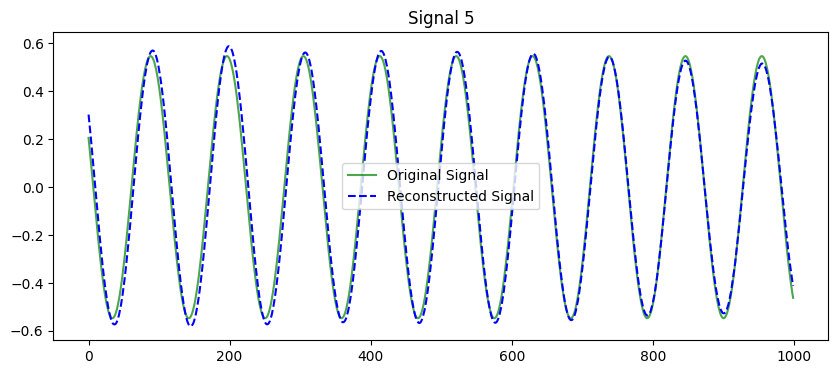

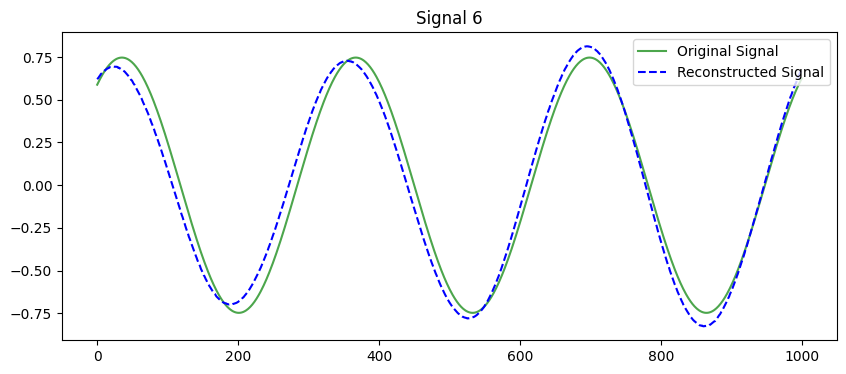

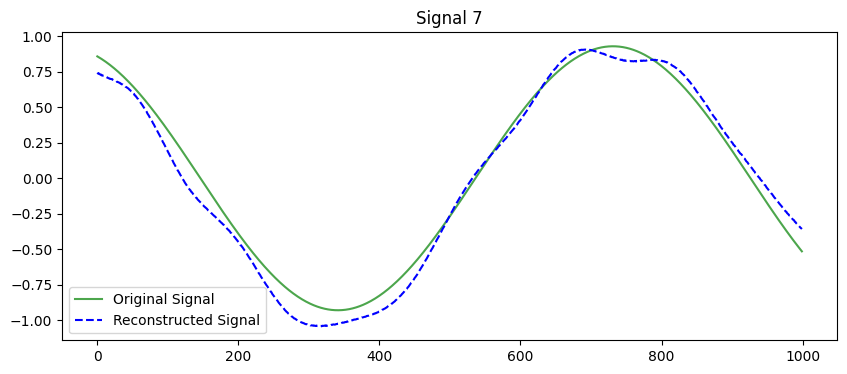

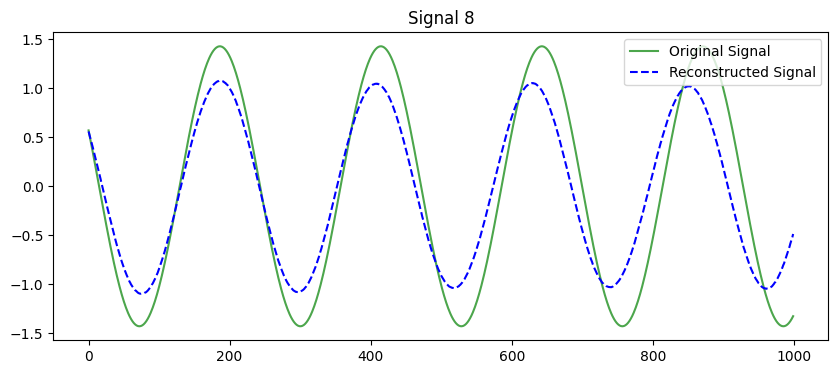

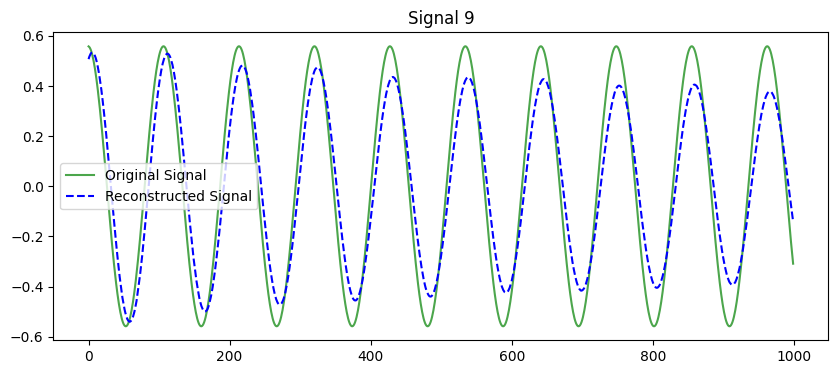

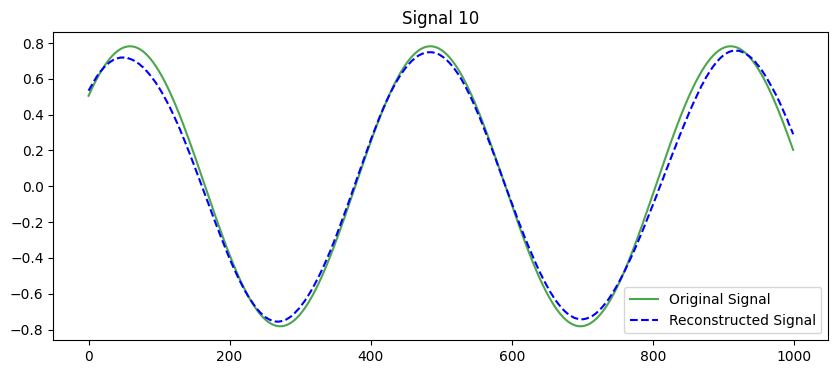

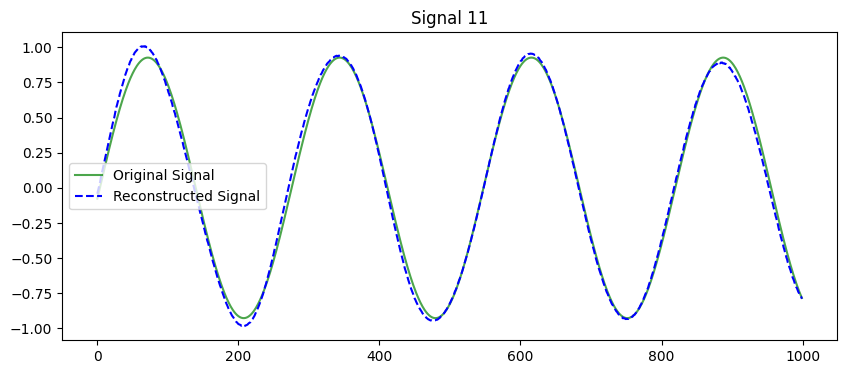

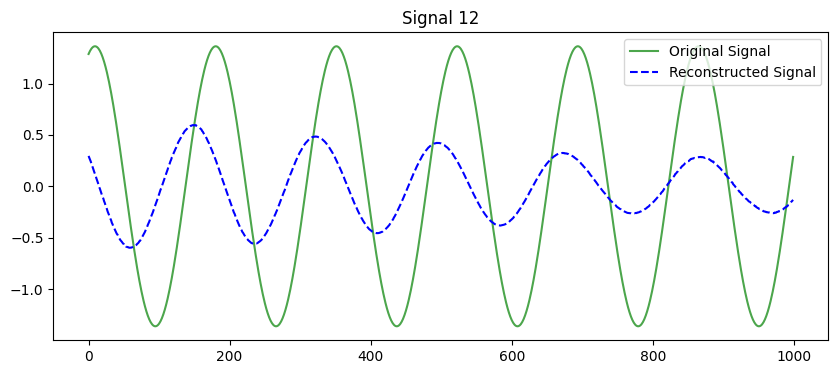

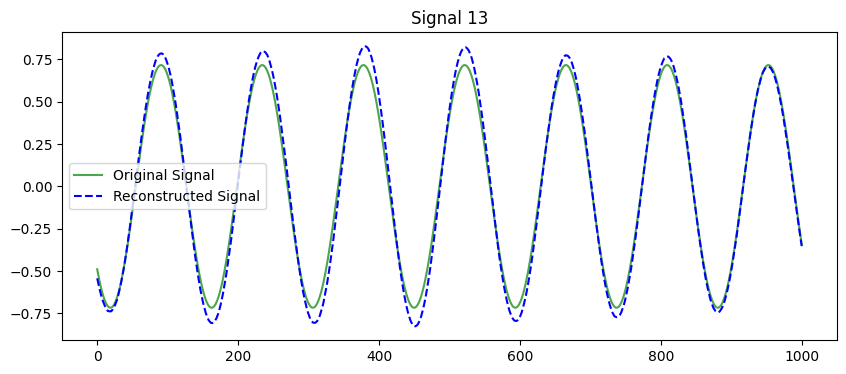

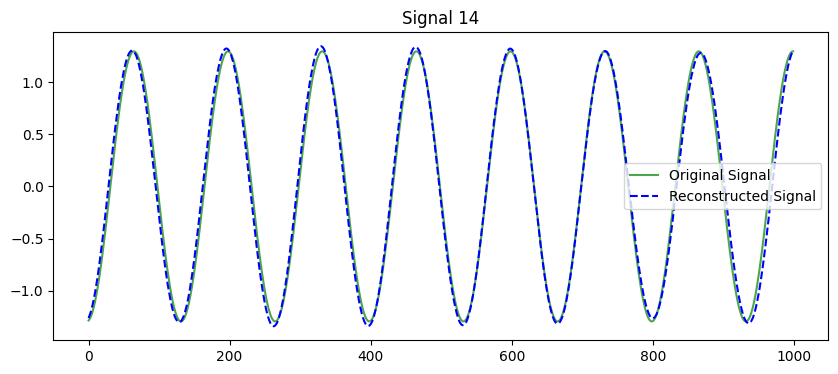

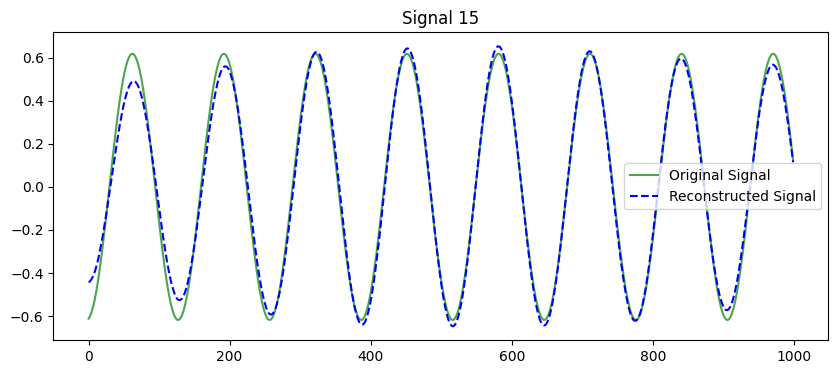

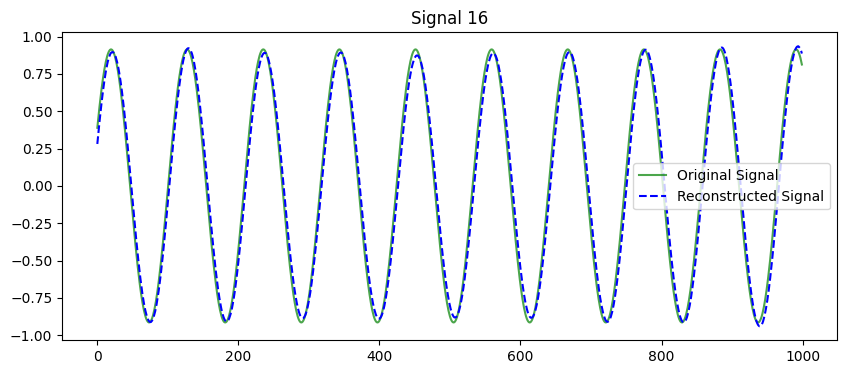

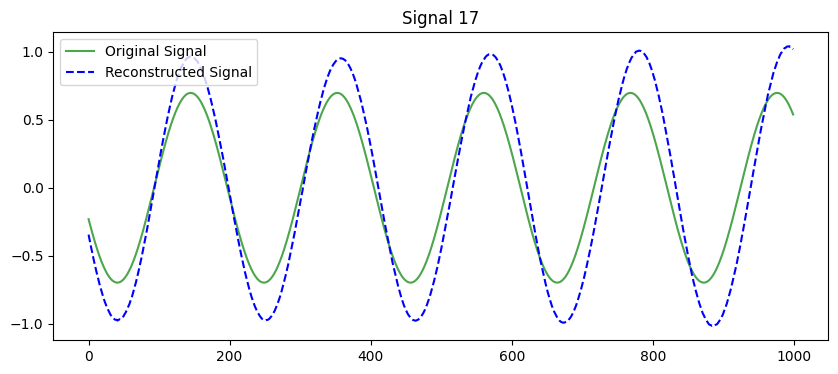

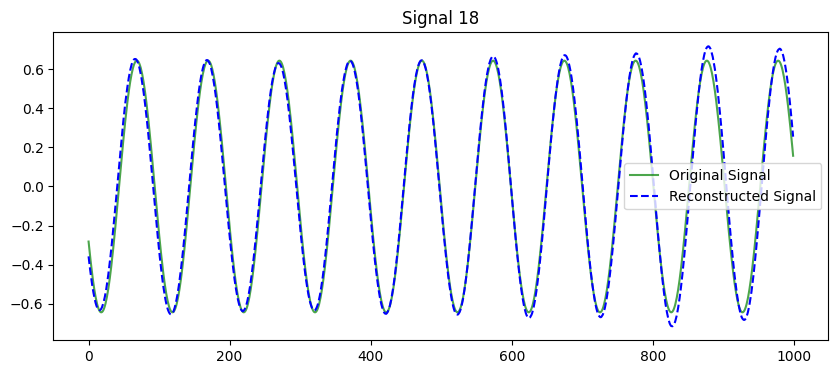

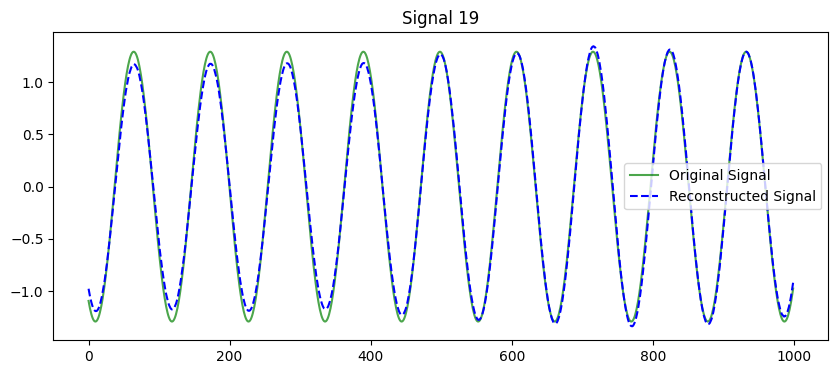

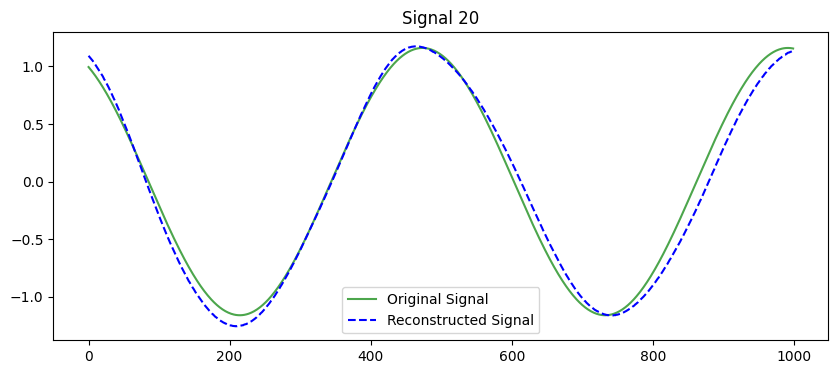

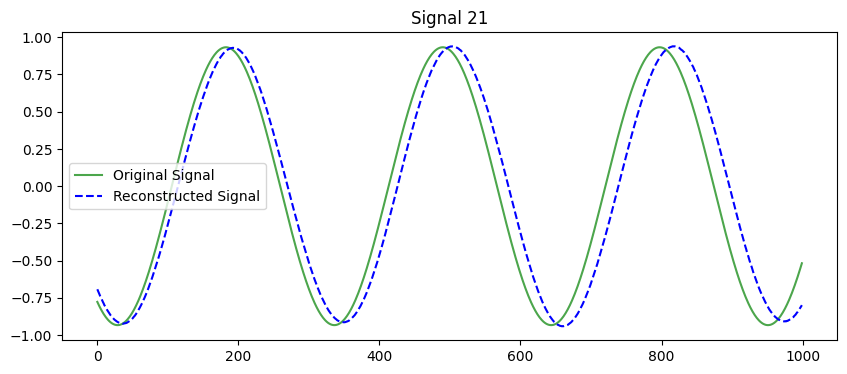

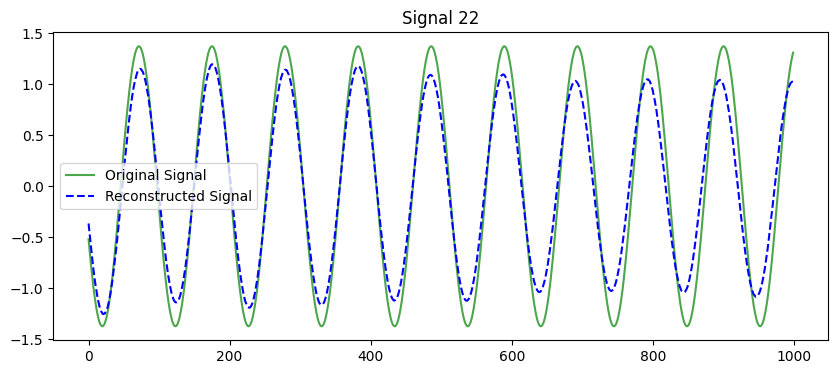

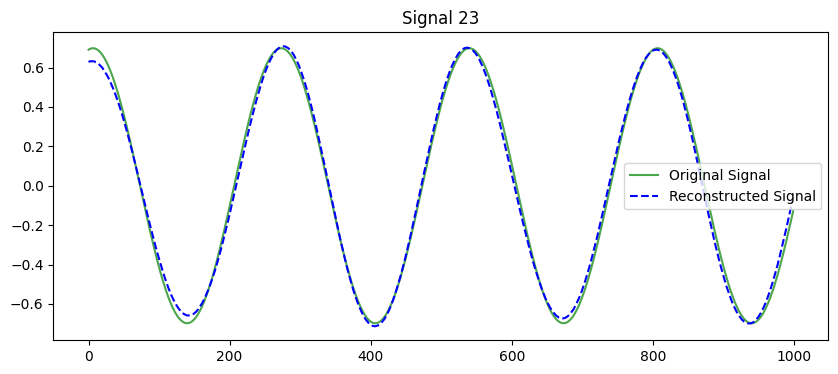

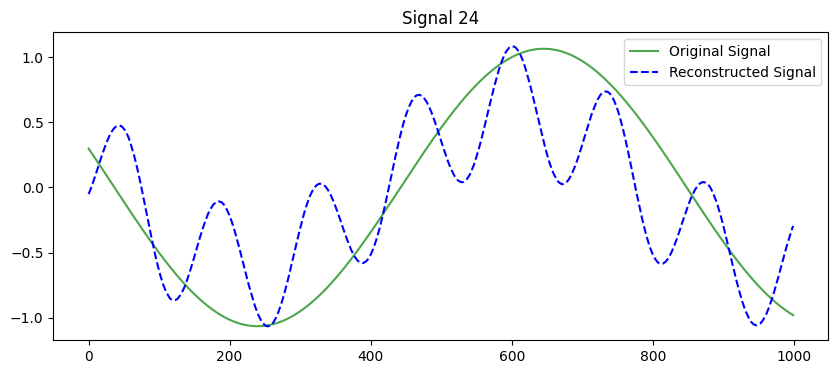

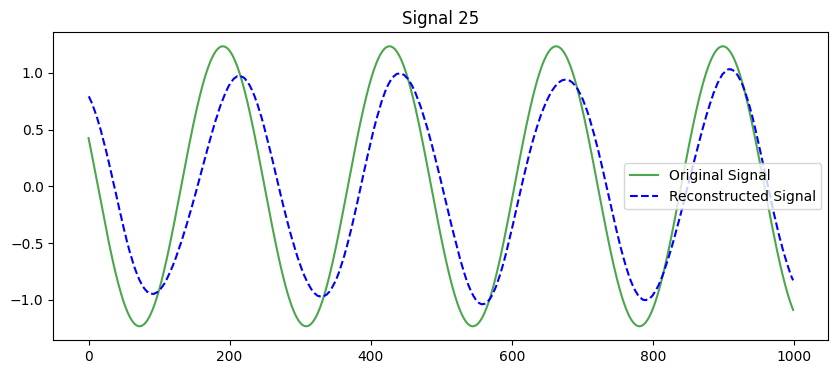

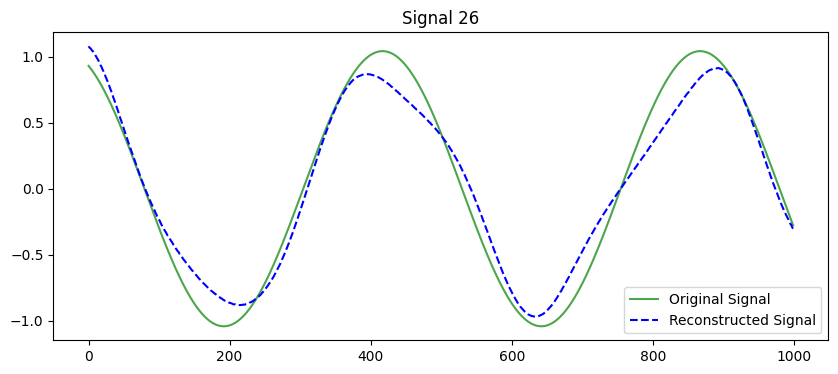

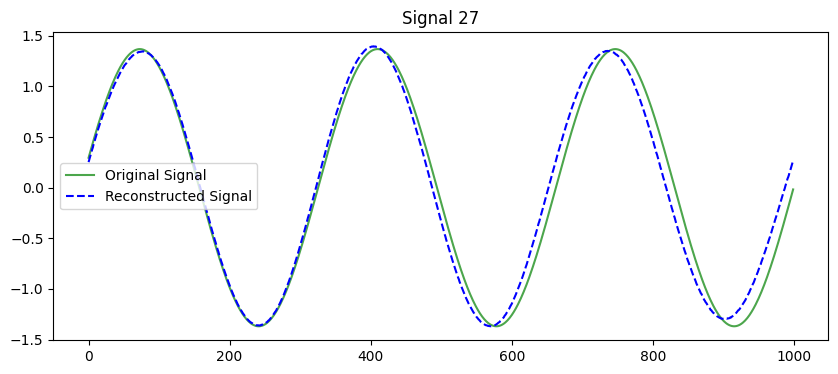

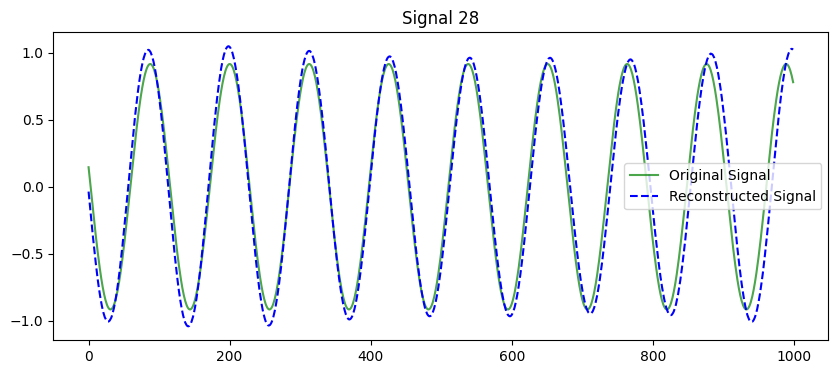

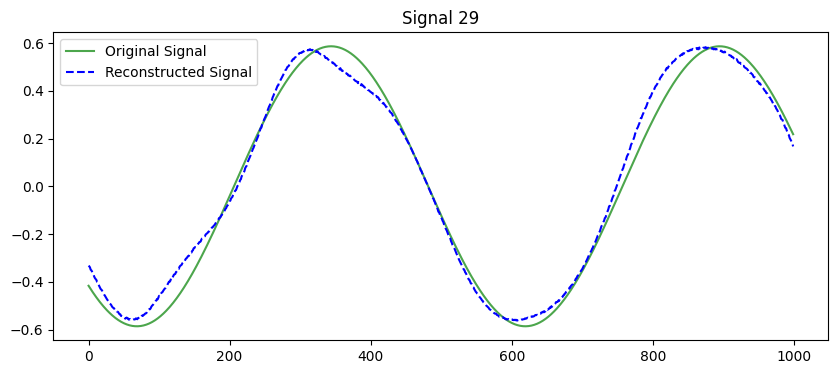

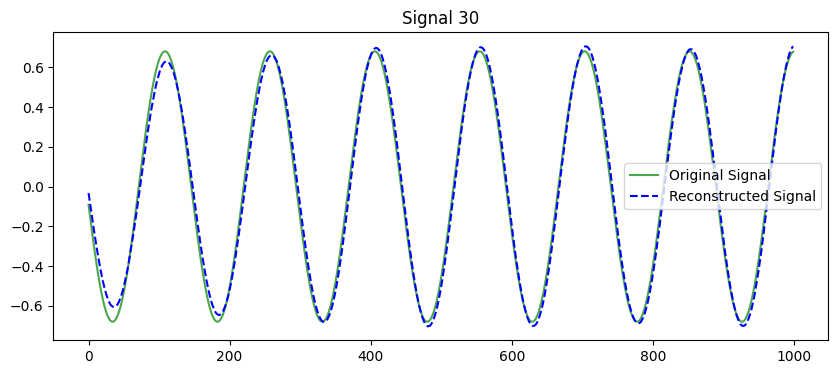

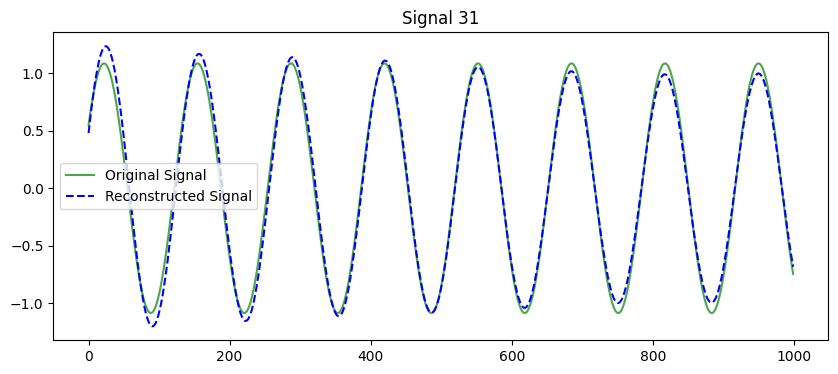

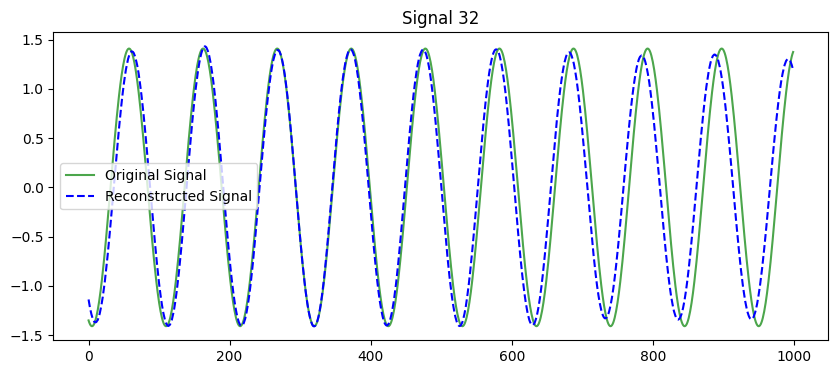

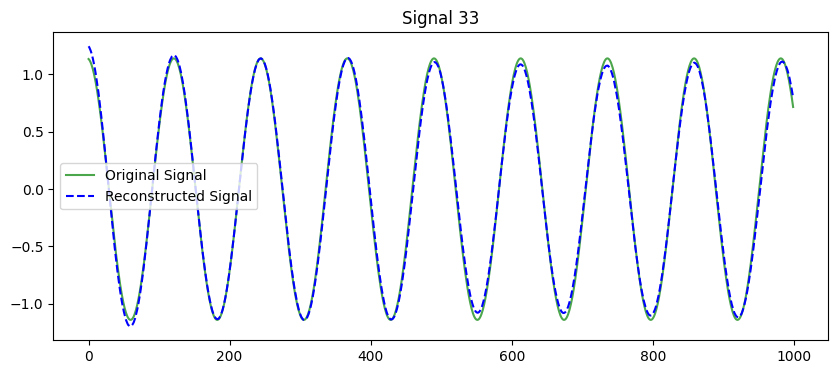

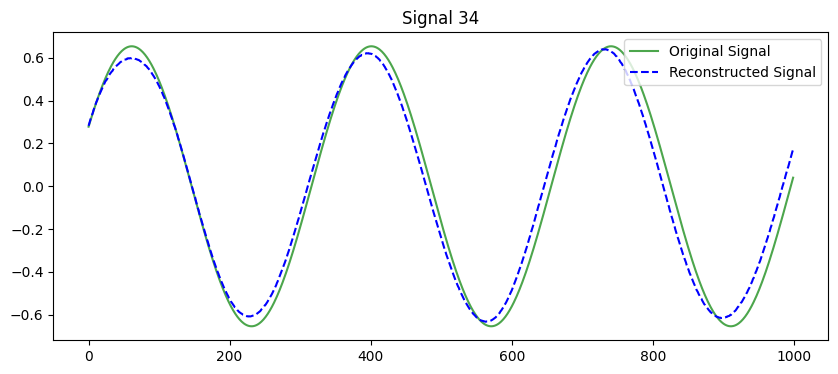

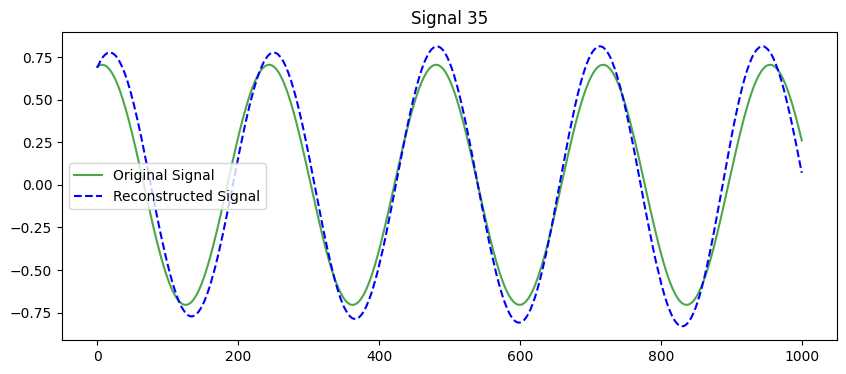

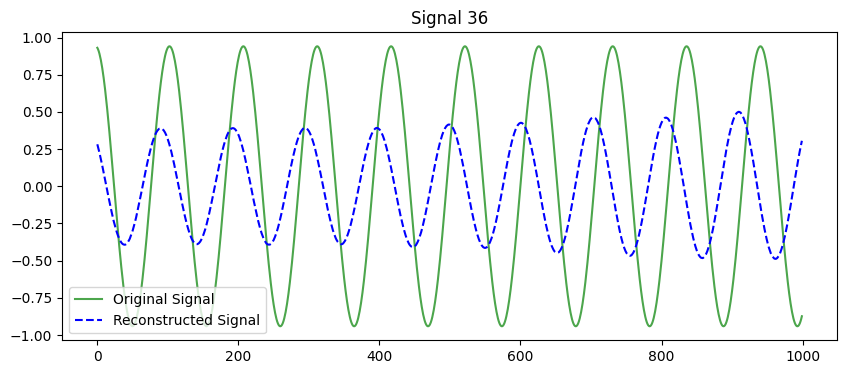

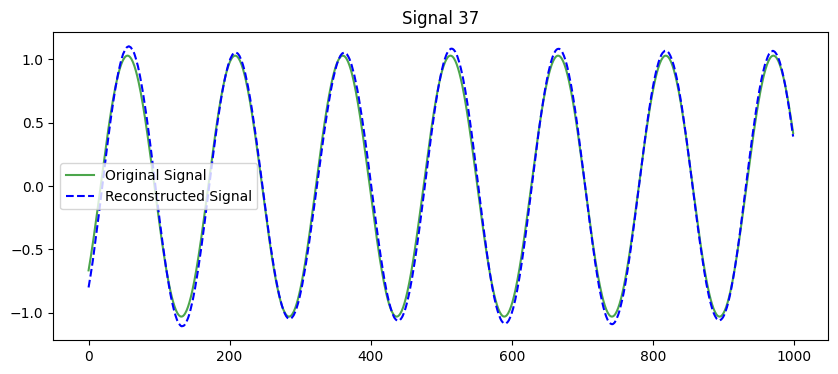

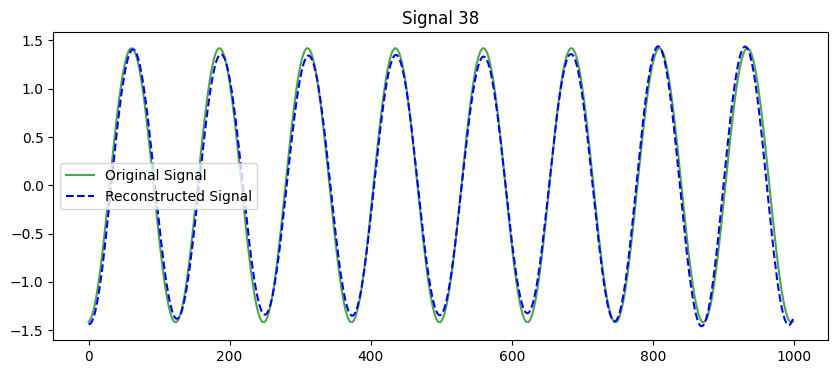

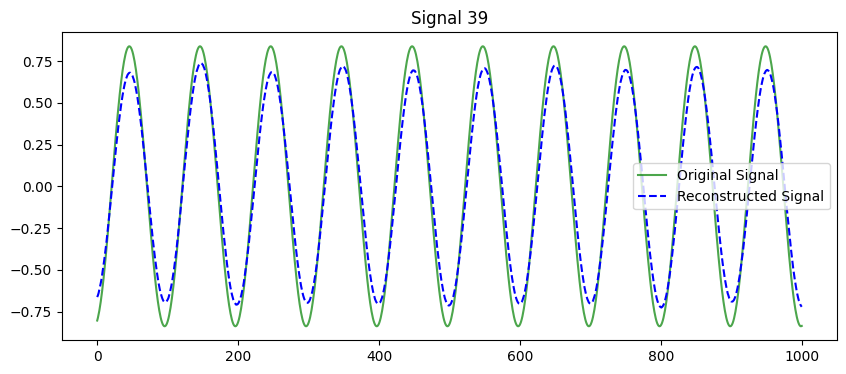

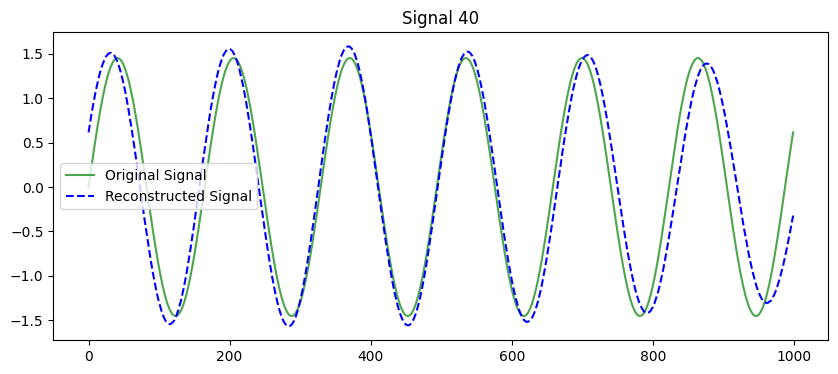

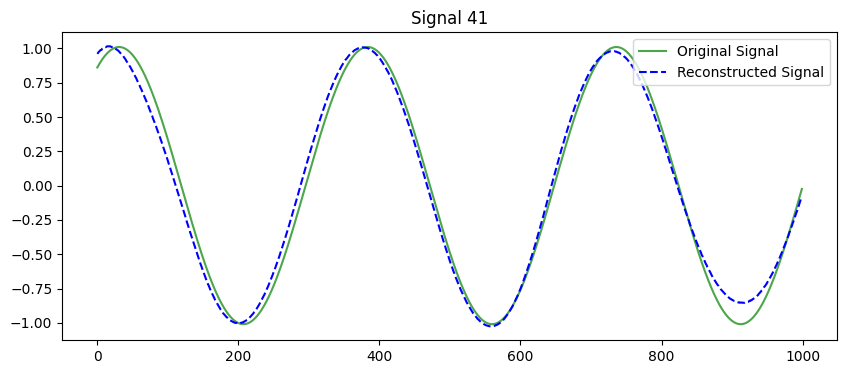

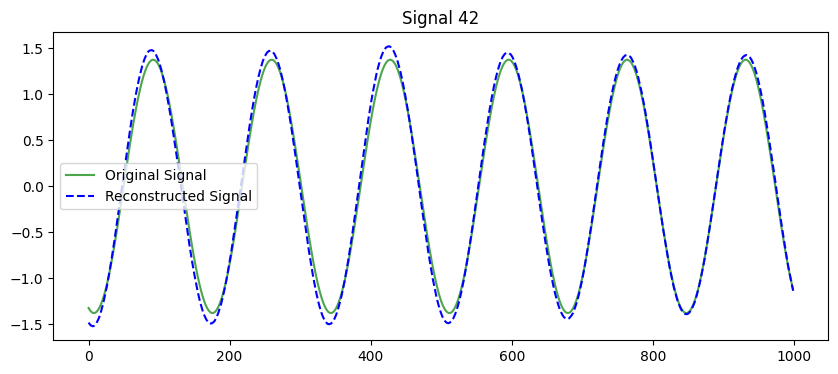

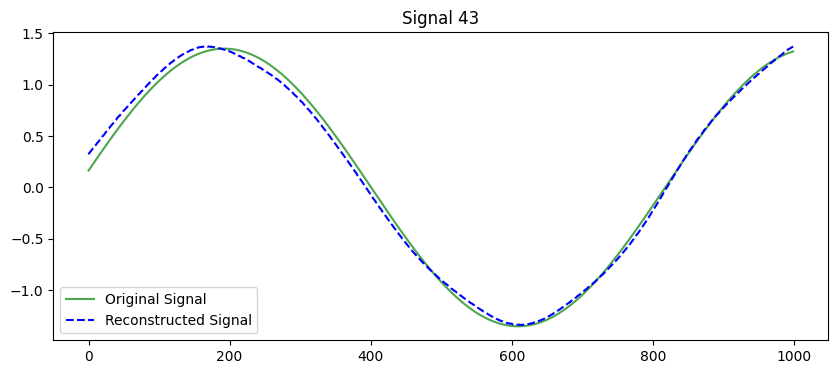

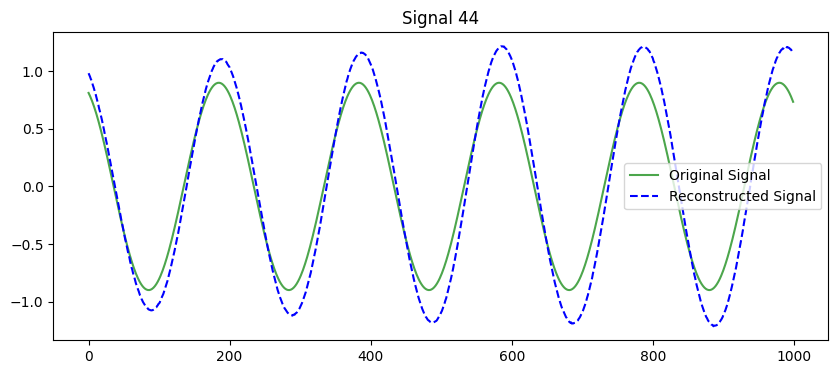

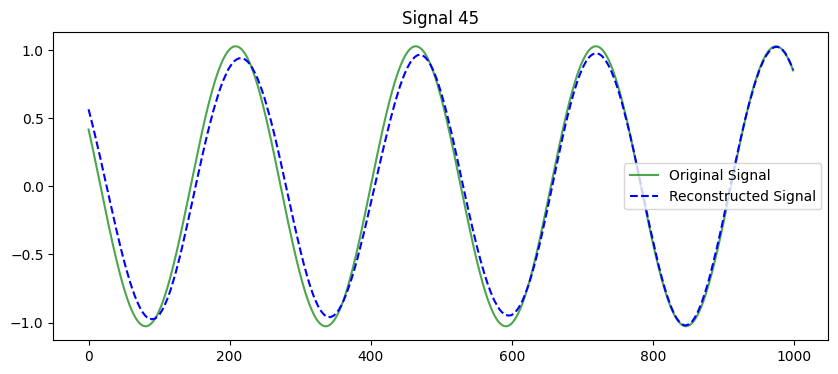

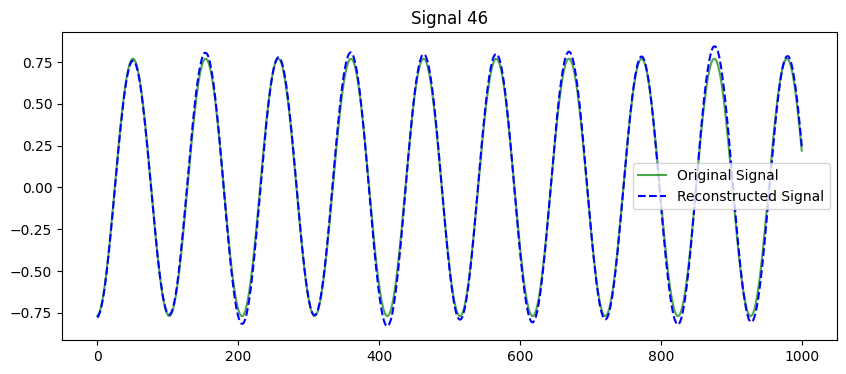

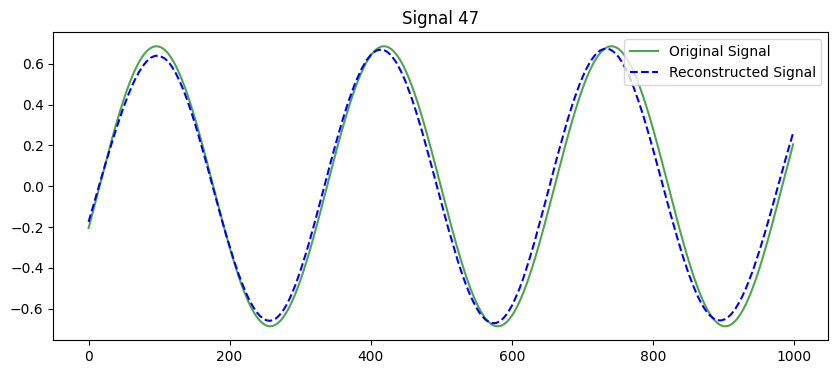

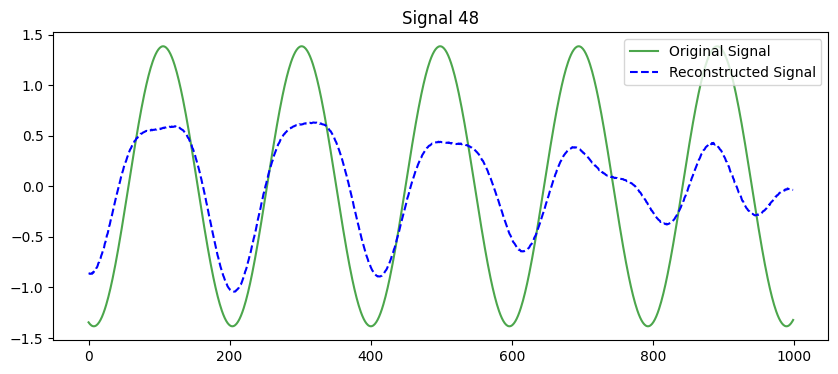

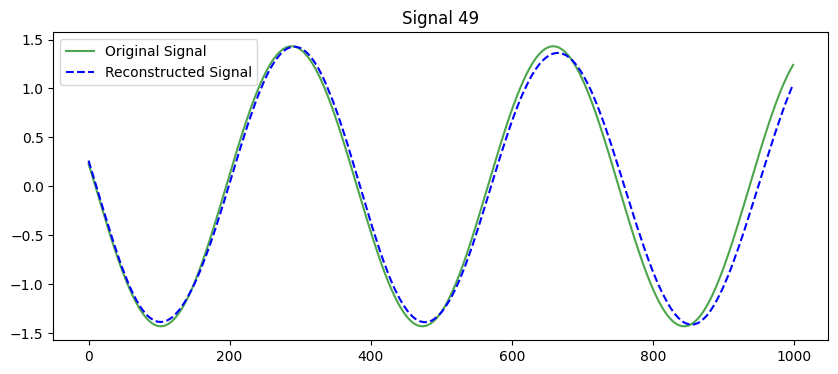

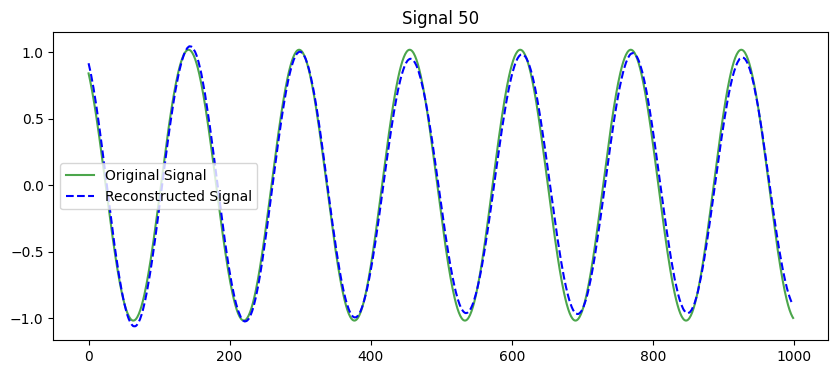

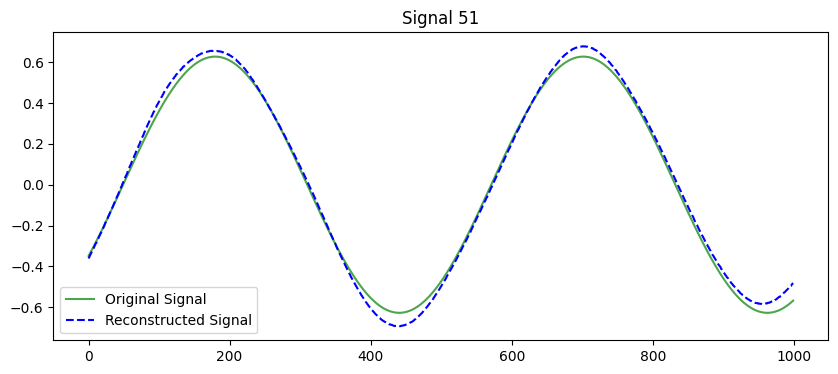

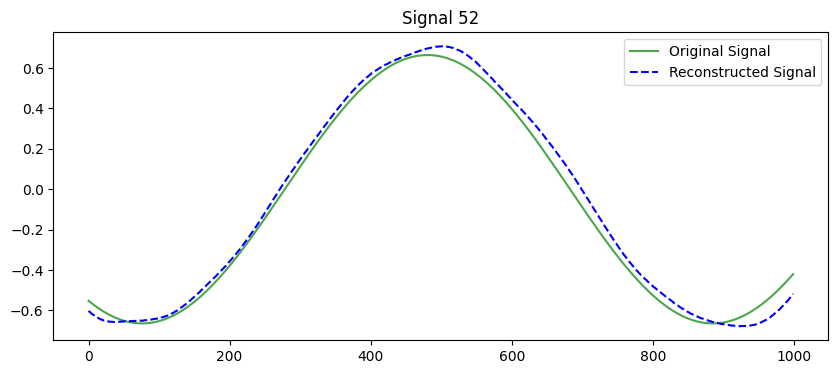

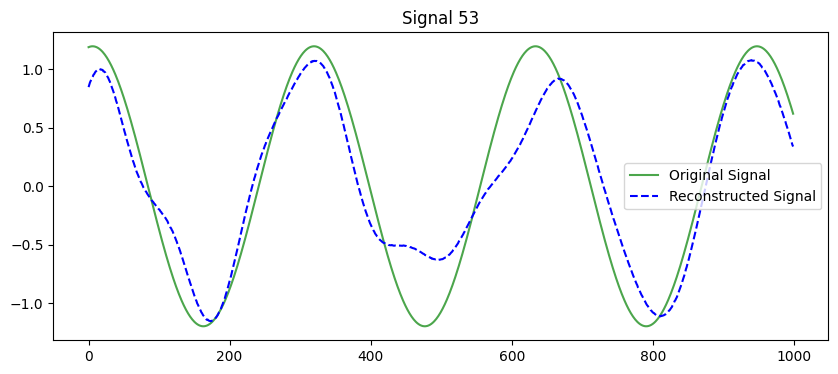

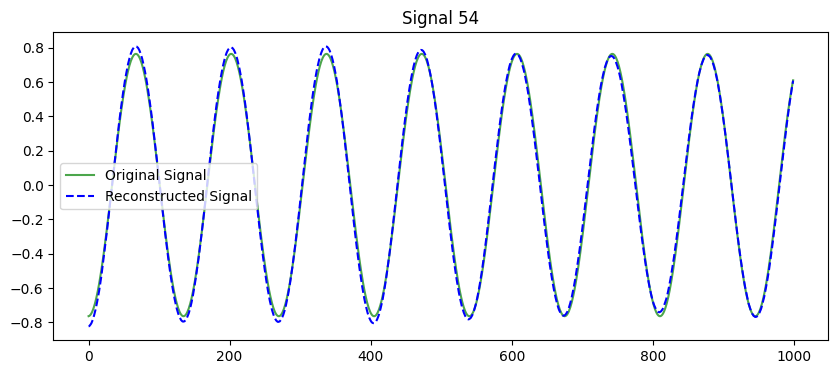

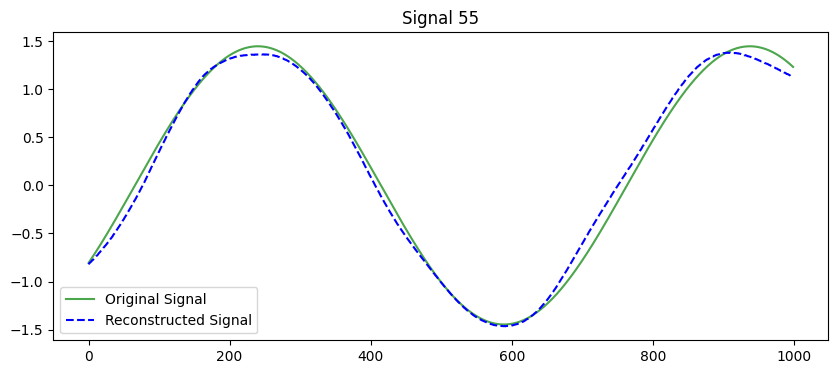

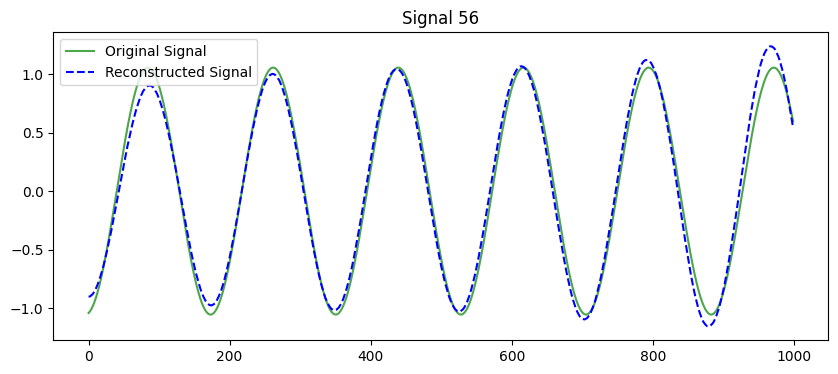

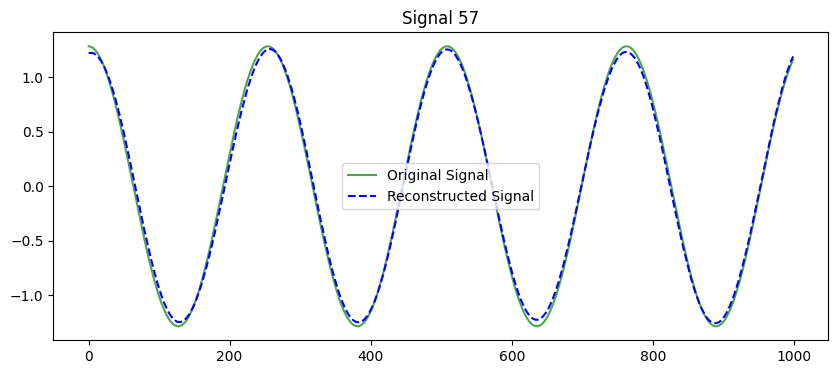

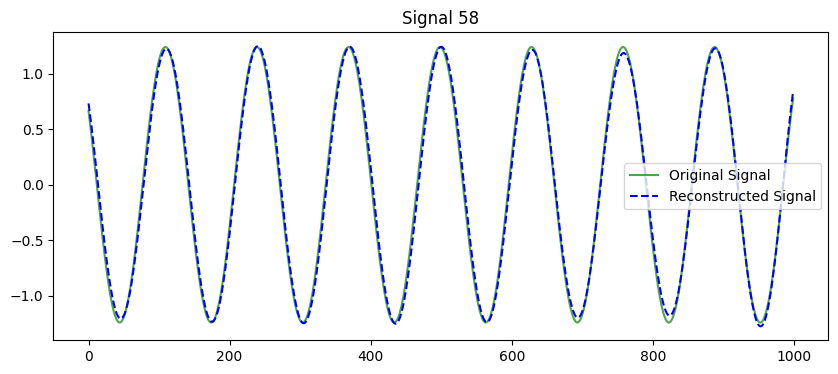

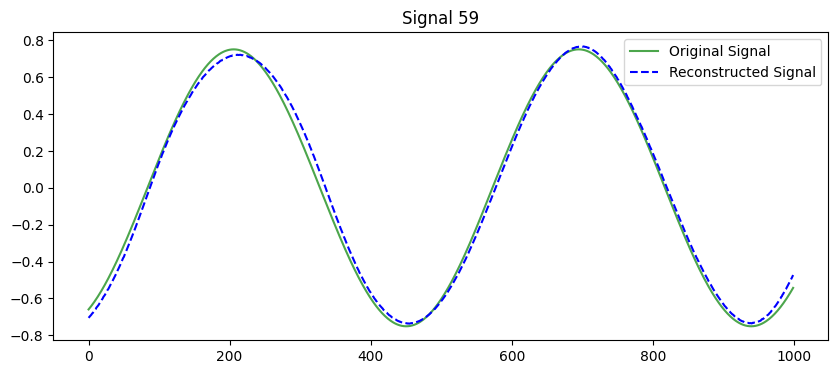

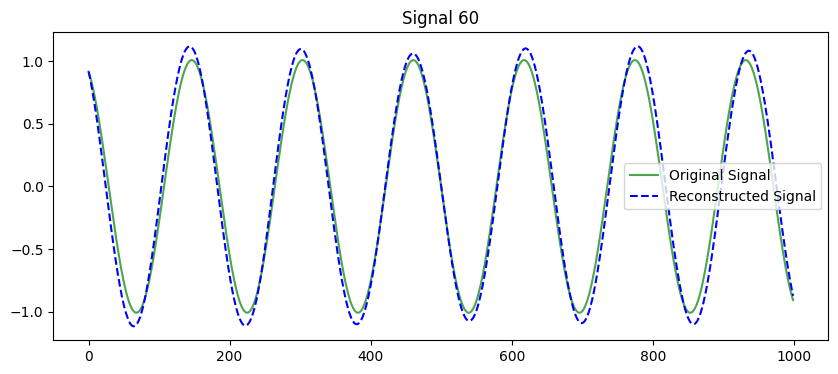

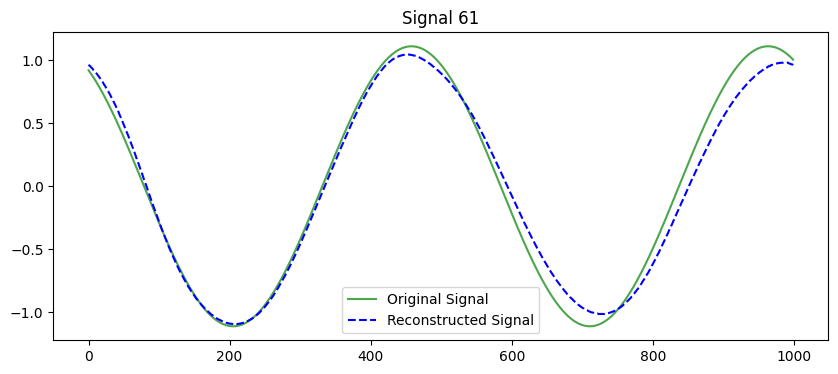

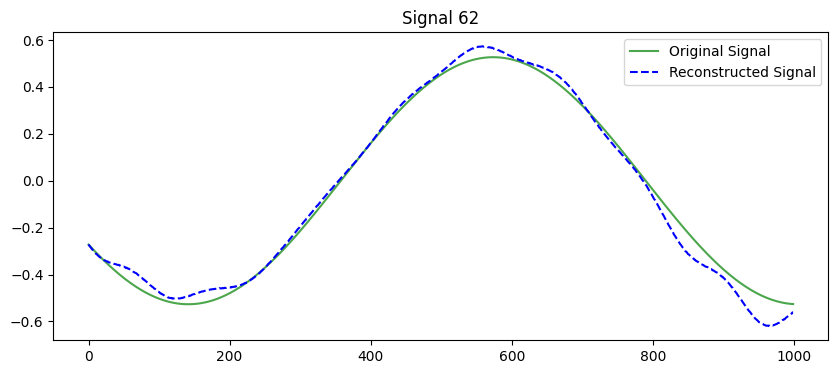

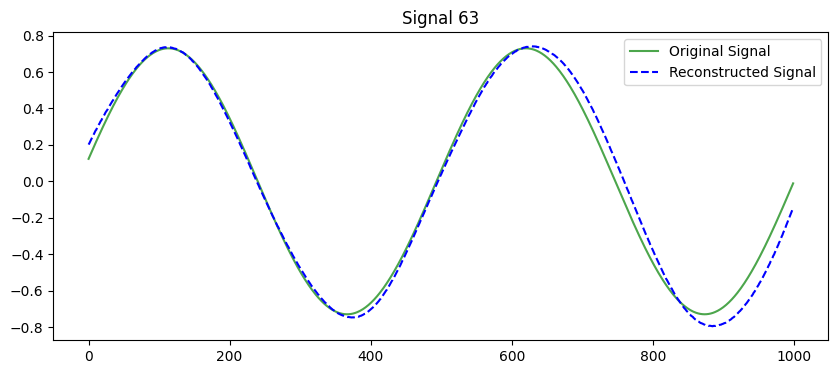

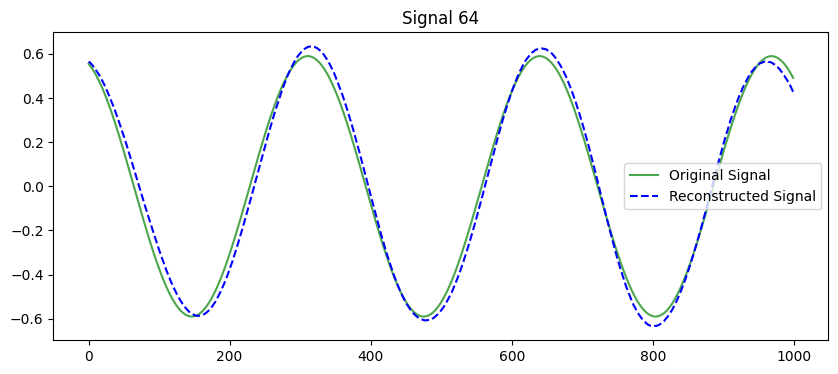

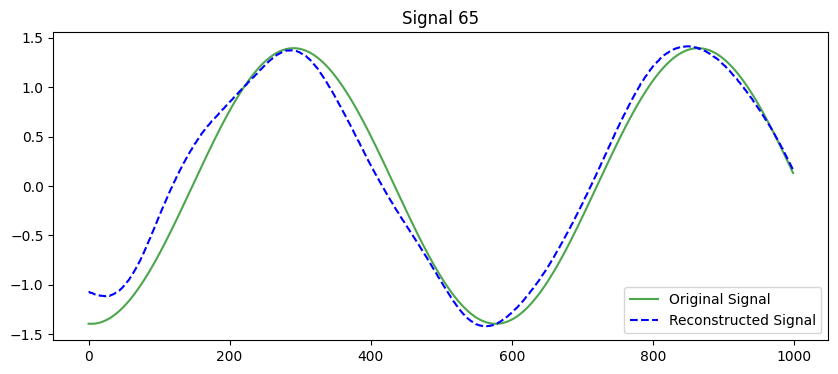

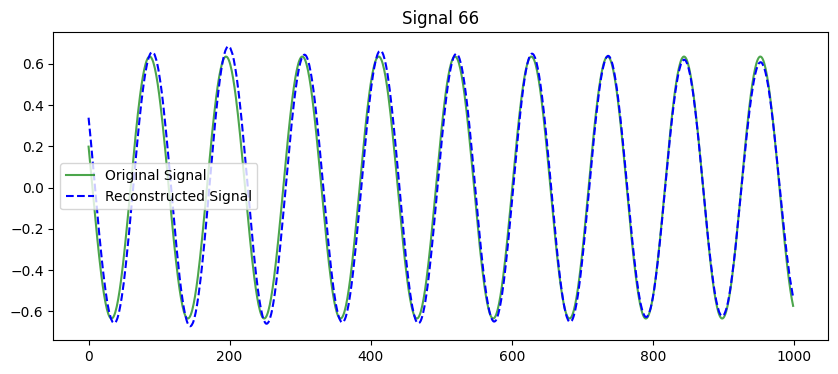

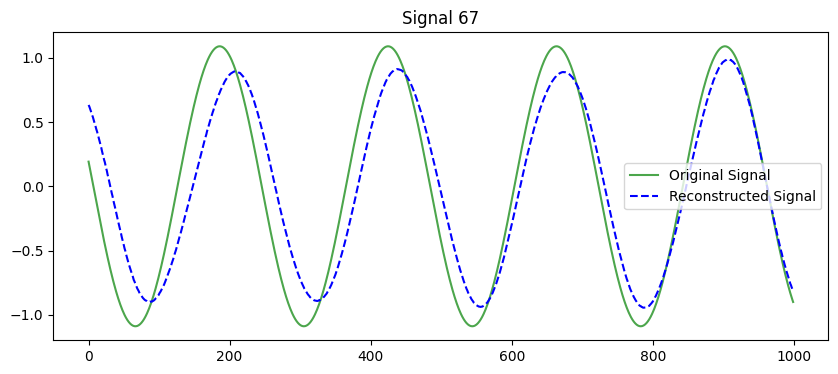

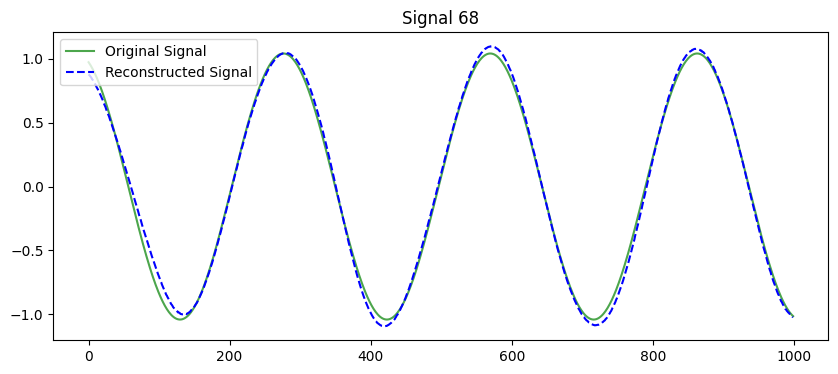

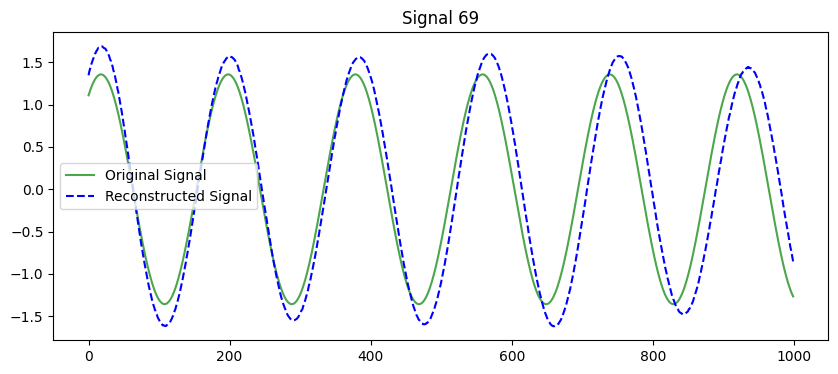

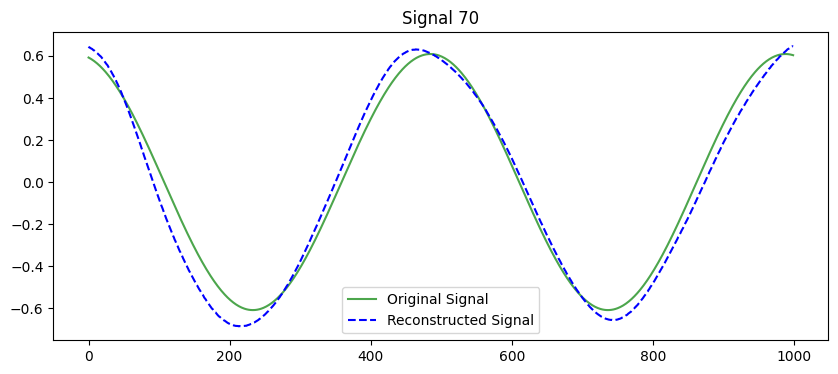

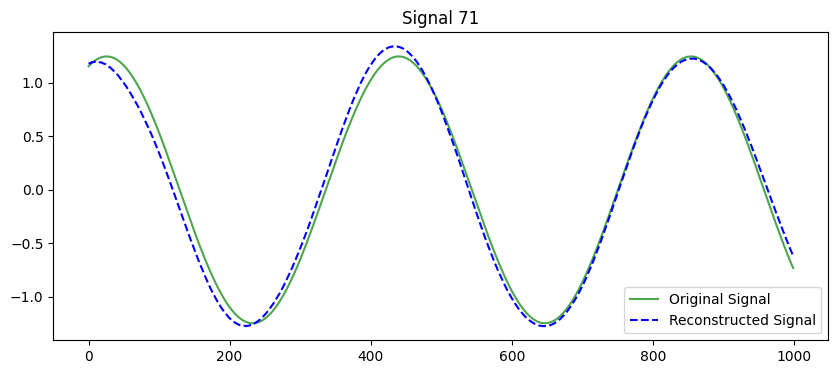

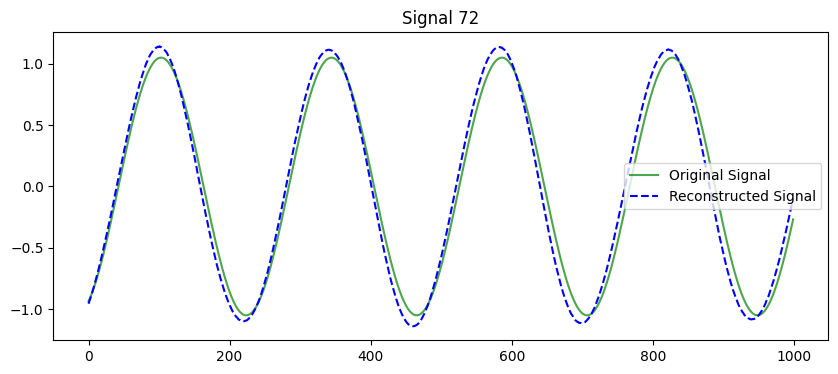

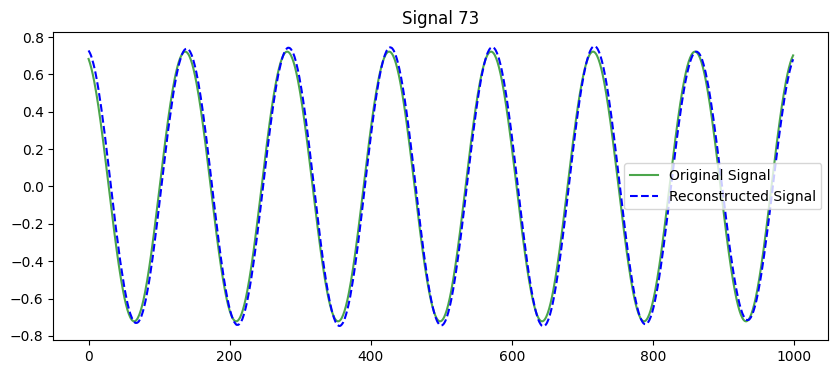

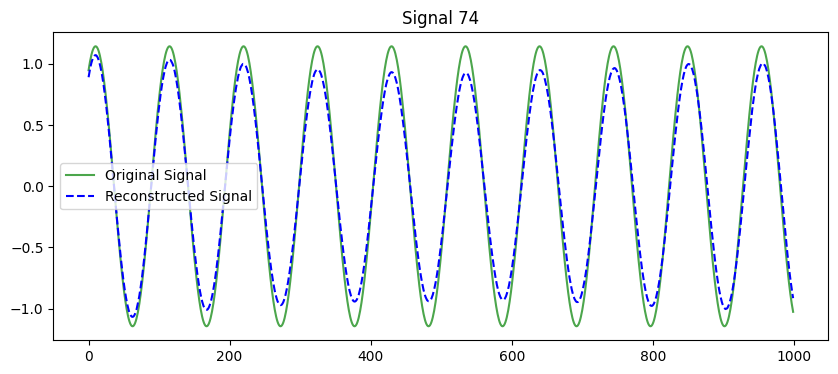

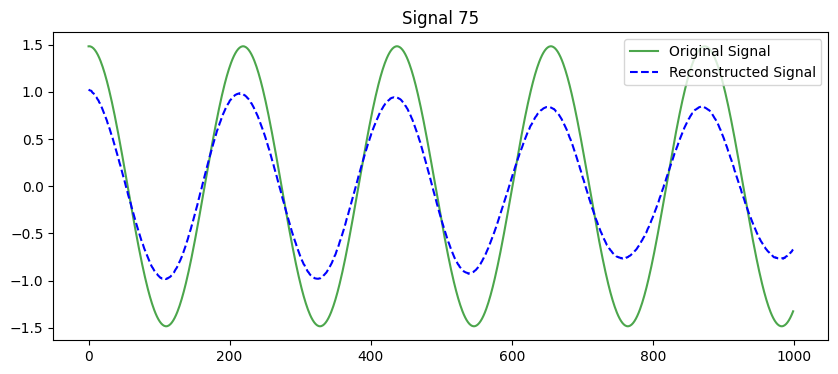

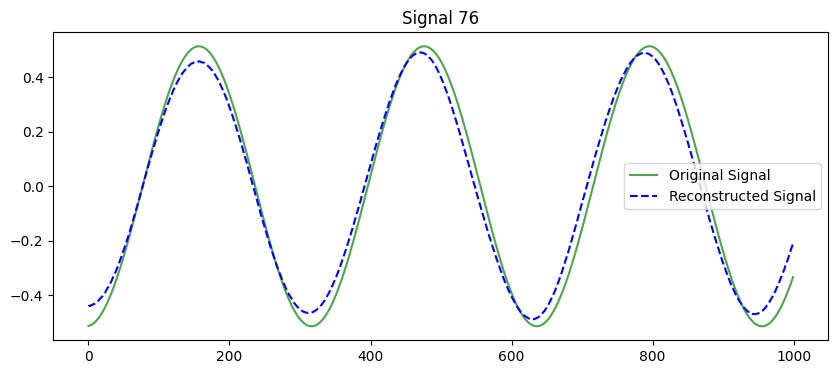

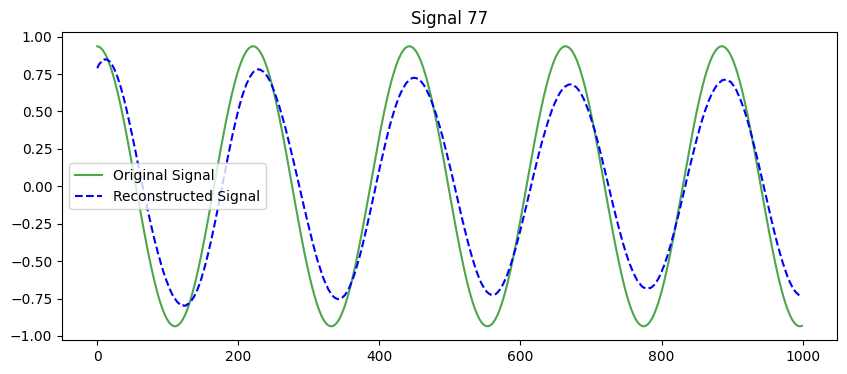

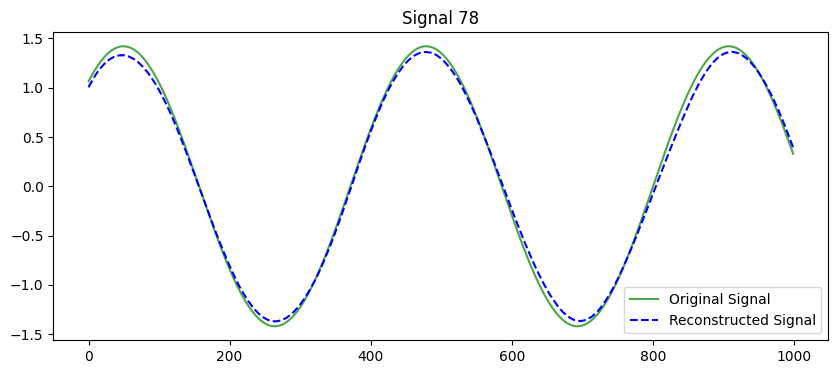

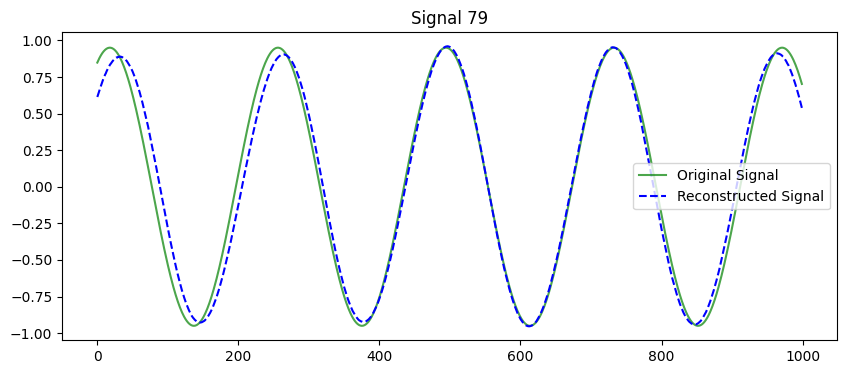

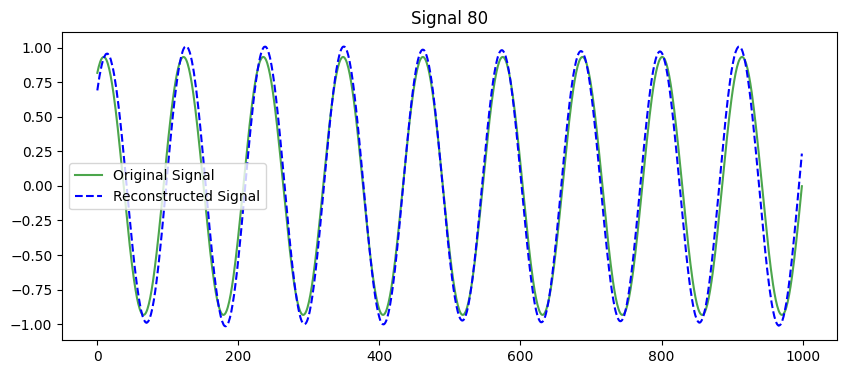

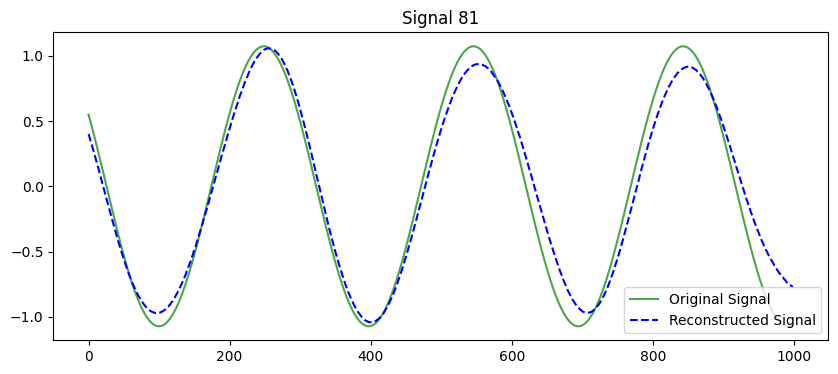

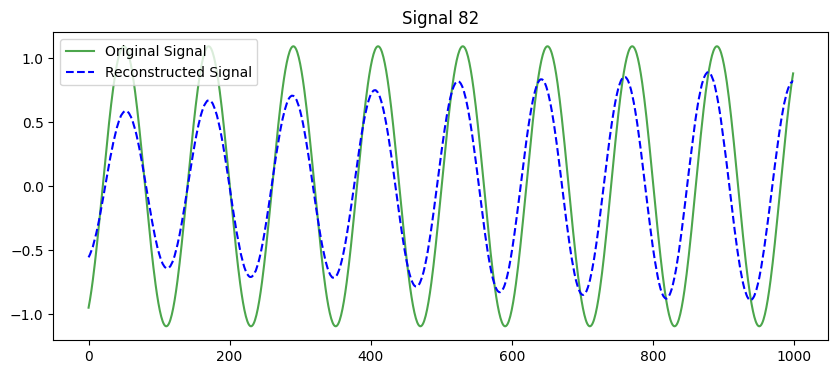

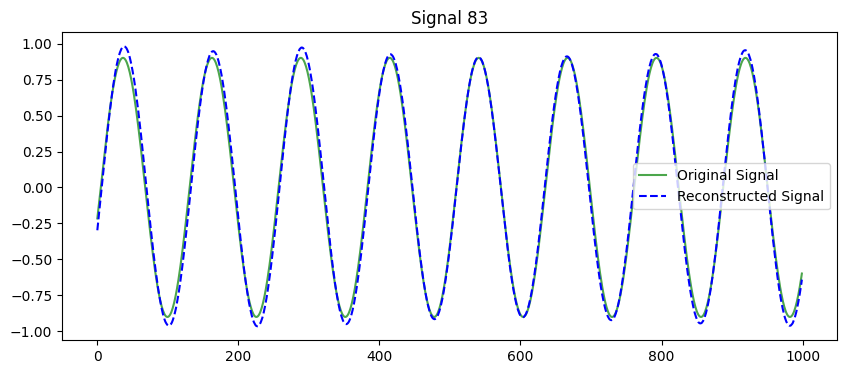

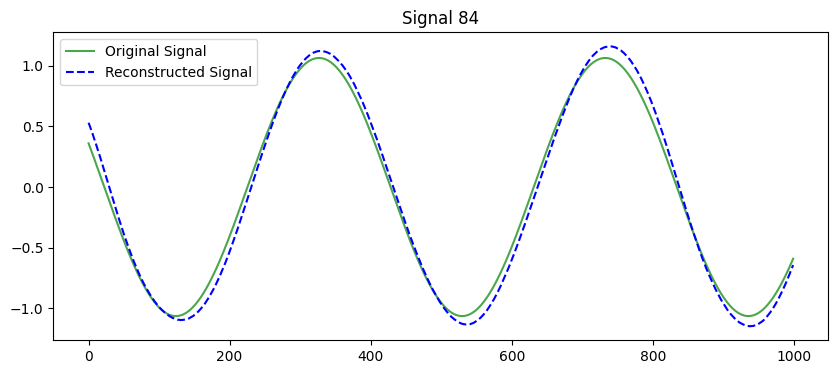

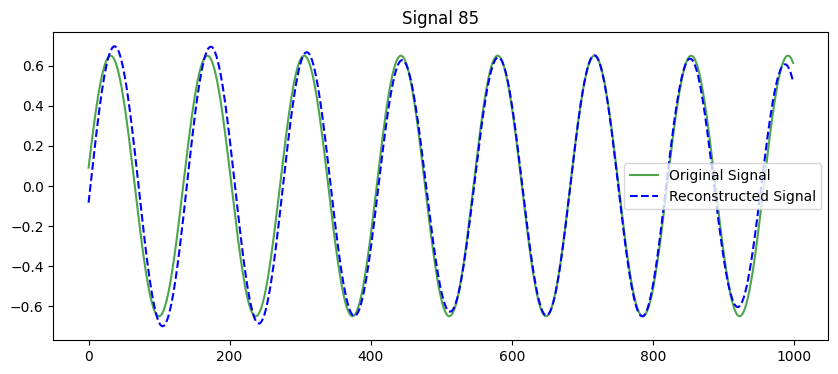

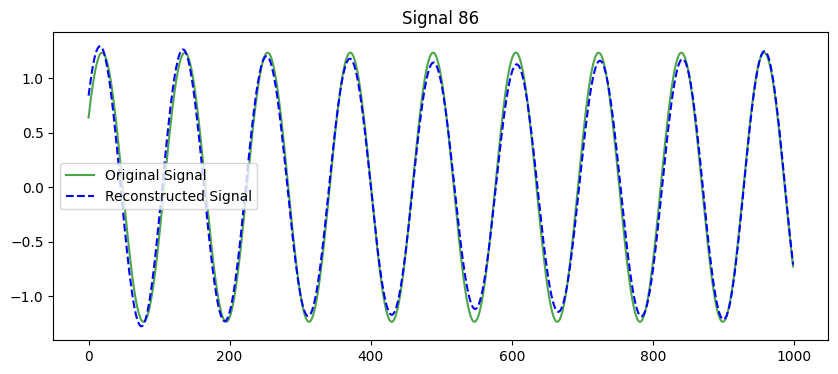

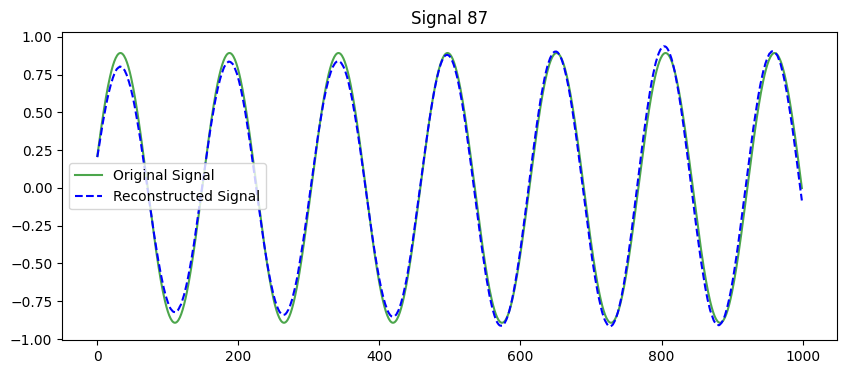

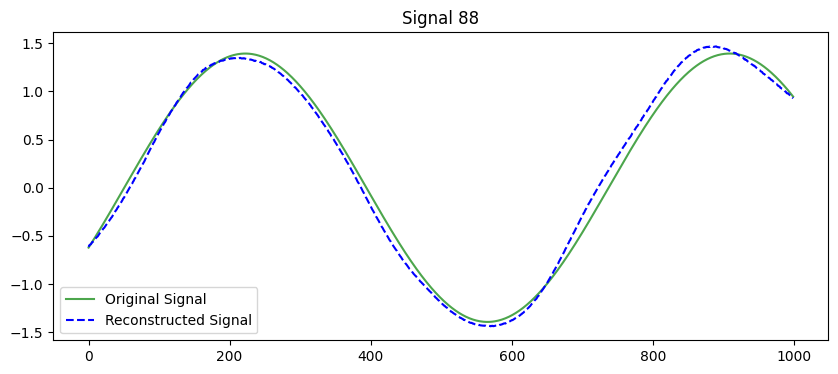

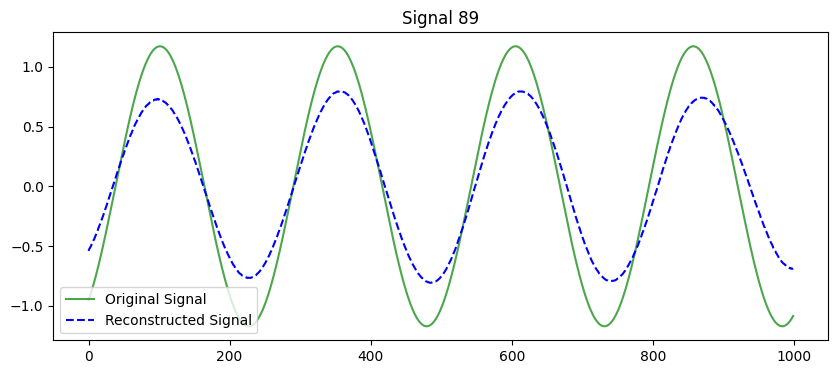

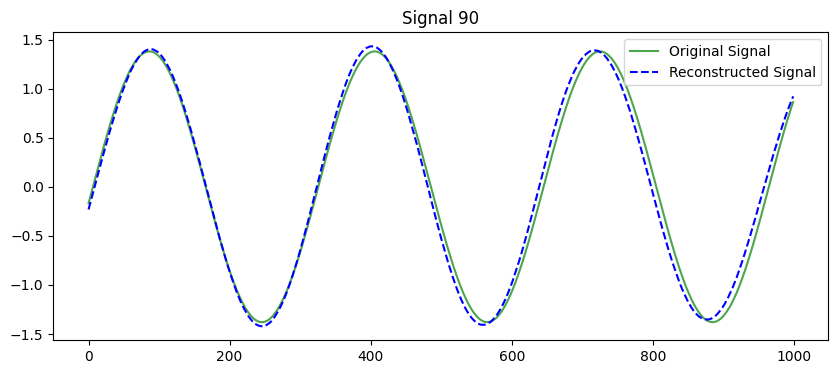

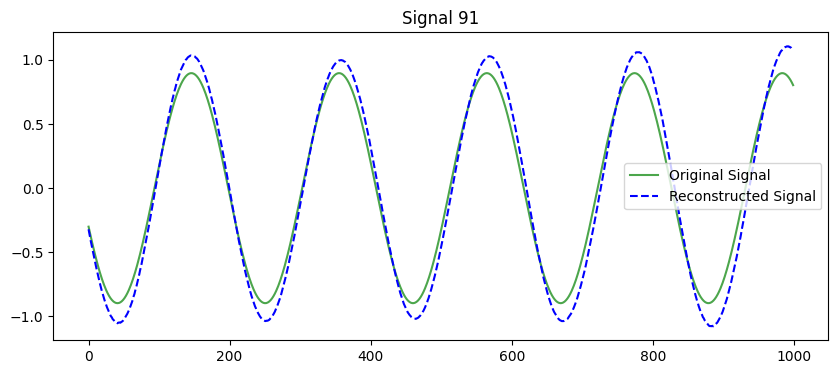

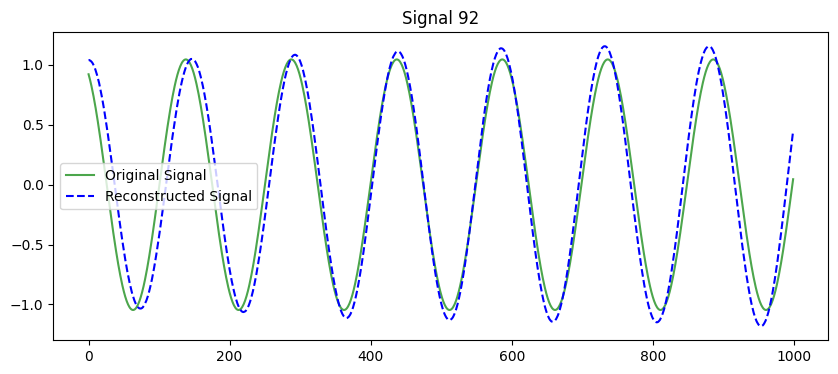

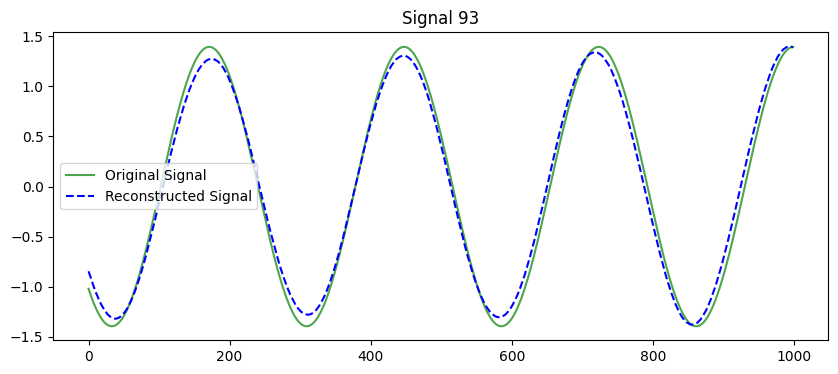

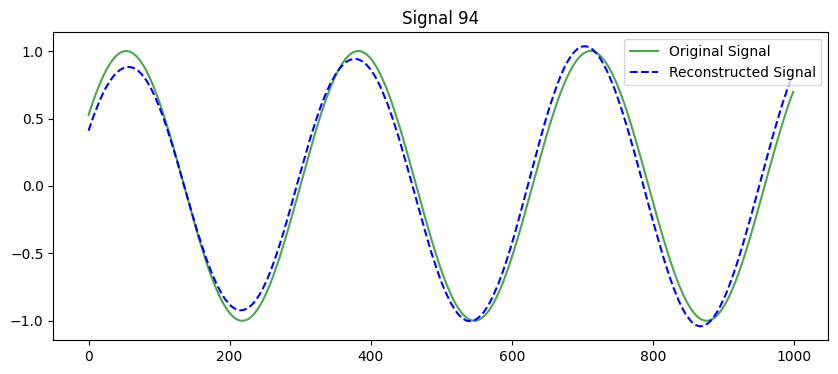

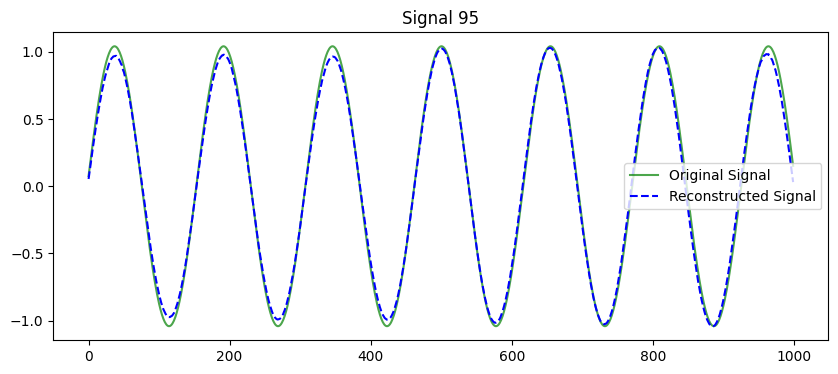

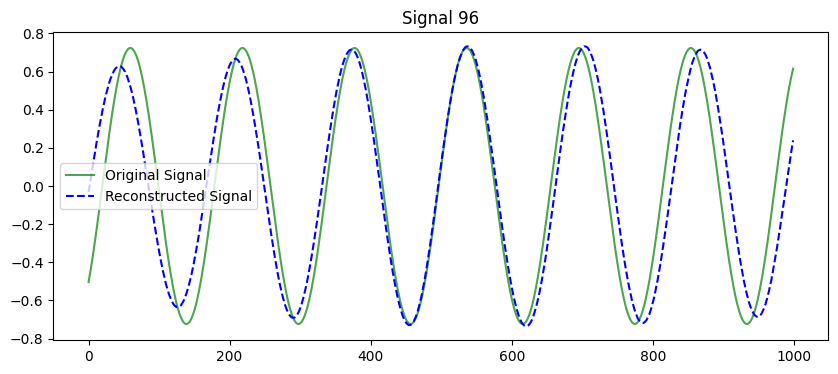

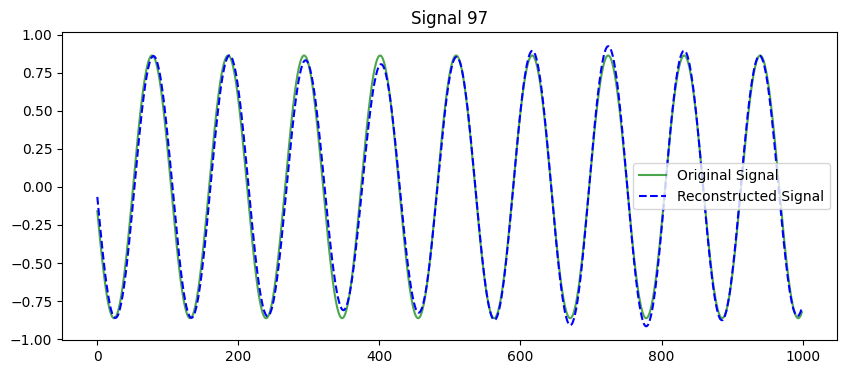

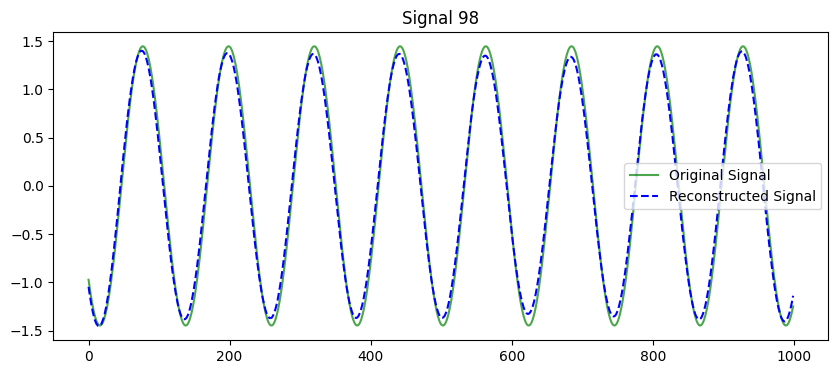

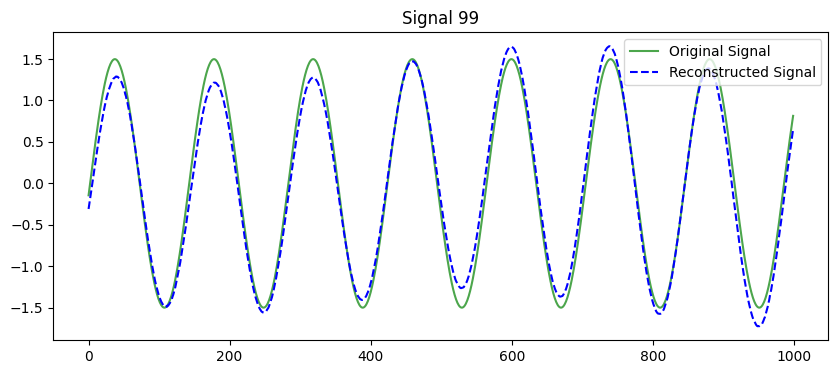

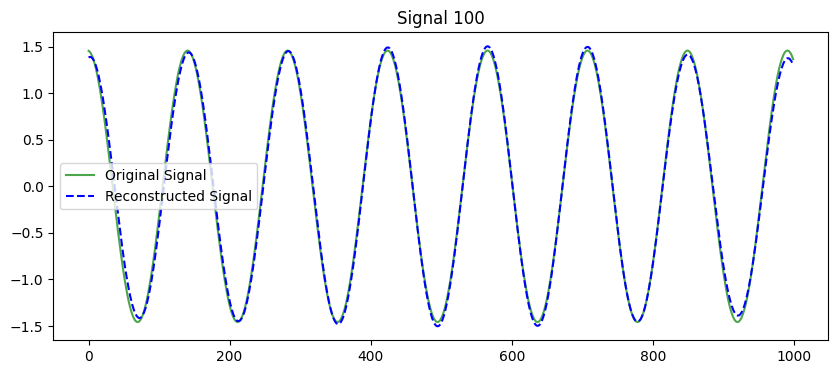

In [ ]:
# Візуалізація сигналів
for i in range(100):  # Відобразимо всі 100 сигналів
    plt.figure(figsize=(10, 4))
    plt.plot(X_test[i], label="Original Signal", color="green", alpha=0.7)
    plt.plot(reconstructed[i], label="Reconstructed Signal", color="blue", linestyle='--')
    plt.title(f"Signal {i + 1}")
    plt.legend()
    plt.show()